# Contents:

# Chapter 1:Exploratory Data Analysis and Cleaning

                  ## 1.1 Data Exploration
                  ## 1.2 Identify if there is any relation between the type of credit card issued to a disponent with his                                average credit balance maintained in transaction account
                  ## 1.3 Identify whether any demographic factors is showing strong association with loan defaulters

# Chapter 2:Pre-Processing

                  ## 2.1 Missing Value Analysis:
                  ## 2.2 Outlier Analysis
                  ## 2.3 Feature Selection
                  ## 2.4 Feature Scaling
                  ## 2.5 Dividing Data into Training and Test

# Chapter 3:Modelling

                  ## 3.1 Random Forest
                  ## 3.2 Logistic Regression
                  ## 3.3 Naive Bayes
                  ## 3.4 KNN
                  ## 3.5 Decision Tree
                  ## 3.6 Summary of CV Scores
                  
# Chapter 4:Loan Defaulters

              

# Chapter 1

# Exploratory Data Analysis and Cleaning

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from scipy.stats import mode 
from fancyimpute import KNN
from scipy.stats import chi2_contingency
from sklearn.preprocessing import MinMaxScaler

## 1.1 Data Exploration

### Understanding accounts in the bank

In [67]:
account=pd.read_csv("C:/Users/mudmoham/Documents/pr/Banking_Case_Study/banking_data/account.txt",sep=";",parse_dates=["date"])

In [68]:
account.head()

,account_id,district_id,frequency,date
0,576,55,POPLATEK MESICNE,1993-01-01
1,3818,74,POPLATEK MESICNE,1993-01-01
2,704,55,POPLATEK MESICNE,1993-01-01
3,2378,16,POPLATEK MESICNE,1993-01-01
4,2632,24,POPLATEK MESICNE,1993-01-02


### Checking Missing Values

In [ ]:
pd.isnull(account).sum()

In [ ]:
account.info()

In [ ]:
account.describe()

In [ ]:
account["account_id"].nunique()

In [ ]:
account["district_id"].value_counts()[0:10]

In [ ]:
account.describe(include=["object","datetime64[ns]"])

In [ ]:
account.columns

In [ ]:
account["frequency"].value_counts()

### Insights:

Most of the accounts follow Monthly Insurance
Most of the accounts are from district 1
There are 4500 accounts
Accounts are from 77 different branches

### Understanding Clients:

In [ ]:
clients=pd.read_csv("C:/Users/mudmoham/Documents/pr/Banking_Case_Study/banking_data/client.txt",sep=";",parse_dates=["birth_number"])

In [ ]:
clients.head()

### Feature Engineering-Adding Gender Column

Here we have birth_number column is object dtype and it is coded as
The value is in the form: YYMMDD (for men)
The value is in the form: YY(+50MM)DD (for women)

Let's decode it and one more column "Gender" to clients dataframe.
if month>50 then it is female
if month<50 then it is male


In [ ]:
gender_list=[]
for row in range(clients.shape[0]):
    if int(clients["birth_number"][row][2:4])>50:
        gender_list.append("Female")
        if int(clients["birth_number"][row][2:4])-50 >=10:
            clients["birth_number"][row]=str(19)+str(clients["birth_number"][row][0:2])+str(int(clients["birth_number"][row][2:4])-50)+str(clients["birth_number"][row][4:])
        else:
            clients["birth_number"][row]=str(19)+str(clients["birth_number"][row][0:2])+str(0)+str(int(clients["birth_number"][row][2:4])-50)+str(clients["birth_number"][row][4:])
    else:
        gender_list.append("Male")
        clients["birth_number"][row]=str(19)+str(clients["birth_number"][row])

clients["Gender"]=gender_list
clients["birth_number"]=pd.to_datetime(clients["birth_number"])

In [ ]:
clients.head()

In [ ]:
clients.info()

In [ ]:
clients["Gender"].value_counts()

In [ ]:
clients["district_id"].nunique()

### Insights

There are 5369 clients from 77 different districts
out of them 2724 are Male and 2645 are Female

### Understanding Disposition

In [17]:
disposition=pd.read_csv("C:/Users/mudmoham/Documents/pr/Banking_Case_Study/banking_data/disp.txt",sep=";")

In [18]:
disposition.shape

(5369, 4)

In [19]:
disposition.head()

,disp_id,client_id,account_id,type
0,1,1,1,OWNER
1,2,2,2,OWNER
2,3,3,2,DISPONENT
3,4,4,3,OWNER
4,5,5,3,DISPONENT


In [32]:
disposition["account_id"].nunique()

4500

In [33]:
disposition["client_id"].nunique()

5369

In [34]:
disposition["account_id"].value_counts()[0:5]

1051    2
3035    2
815     2
928     2
811     2
Name: account_id, dtype: int64

In [35]:
disposition["client_id"].value_counts()[0:5]

2047    1
573     1
577     1
4675    1
2628    1
Name: client_id, dtype: int64

In [36]:
disposition["type"].value_counts()

OWNER        4500
DISPONENT     869
Name: type, dtype: int64

## Insights

We can see there are 5369 relations between client id's and account_id's
There are total 5369 clients having 4500 accounts
Mutual Accounts-869 Owners and 869 Disponants
Non Mutual Account-3631 Owners
Only 4500 owners can request loans


### Understanding Loans

In [65]:
loans=pd.read_csv("C:/Users/mudmoham/Documents/pr/Banking_Case_Study/banking_data/loan.txt",sep=";",parse_dates=["date"])

In [ ]:
loans.info()

In [66]:
loans.head()

,loan_id,account_id,date,amount,duration,payments,status
0,5314,1787,1993-07-05,96396,12,8033.0,B
1,5316,1801,1993-07-11,165960,36,4610.0,A
2,6863,9188,1993-07-28,127080,60,2118.0,A
3,5325,1843,1993-08-03,105804,36,2939.0,A
4,7240,11013,1993-09-06,274740,60,4579.0,A


In [ ]:
loans["account_id"].nunique()

In [ ]:
loans["status"].value_counts()

In [ ]:
loans

In [ ]:
loans["status"].value_counts().plot(kind='pie')

In [ ]:
loans.sort_values(by="amount",ascending=False)[0:20]["status"].unique()

### Insights

We can see that 682 owners took loans
out of them,
59 percent are in running contract with no debts
6.5 percent are in running contract with debt
29.7 percent have repayed the loans
4.5 percent failed to pay the loans
We can see loans with huge amount has more chance of debt or it will take more time to pay back

### Understanding Demographics

In [57]:
demographics=pd.read_csv("C:/Users/mudmoham/Documents/pr/Banking_Case_Study/banking_data/district.txt",sep=";")

In [58]:
demographics.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040


In [59]:
demographics["A15"].unique()

array(['85677', '2159', '2824', '5244', '2616', '2640', '4289', '5179',
       '2987', '3810', '3475', '3804', '1597', '6604', '1845', '1874',
       '1003', '1740', '999', '1563', '2299', '1089', '2879', '5198',
       '1822', '6041', '1029', '1580', '818', '2985', '1328', '4340',
       '4650', '5323', '3384', '5796', '4147', '2653', '4947', '6949',
       '6445', '1658', '4085', '2166', '2080', '2854', '6079', '1655',
       '1660', '2123', '3496', '2564', '1850', '18721', '3659', '3729',
       '2212', '2595', '1879', '2112', '2719', '1562', '4484', '2157',
       '2247', '3244', '5623', '?', '9878', '4980', '9672', '4355',
       '18782', '4063', '3736', '3460'], dtype=object)

In [60]:
demographics["A12"].unique()

array(['0.29', '1.67', '1.95', '4.64', '3.85', '2.95', '2.26', '1.25',
       '3.39', '0.56', '0.45', '3.83', '2.77', '1.42', '3.13', '1.12',
       '2.38', '2.83', '2.65', '1.51', '1.10', '1.79', '1.39', '2.47',
       '2.64', '0.65', '1.62', '2.82', '3.38', '3.52', '2.80', '5.75',
       '6.43', '1.02', '3.33', '4.46', '7.08', '7.34', '6.49', '3.32',
       '2.41', '1.72', '2.79', '2.28', '1.78', '1.89', '4.83', '2.51',
       '2.52', '2.53', '1.60', '1.88', '4.69', '3.73', '3.24', '3.45',
       '4.76', '1.29', '3.79', '5.74', '3.51', '5.77', '4.09', '?', '6.63',
       '5.93', '3.80', '4.75', '5.38', '4.73', '4.01'], dtype=object)

### Imputing with Mean

We can see that it has "?" which is unknown value.Let us impute them with mean value

In [61]:
demographics["A12"]=pd.to_numeric(demographics["A12"], errors='coerce')
demographics["A15"]=pd.to_numeric(demographics["A15"], errors='coerce')

In [62]:
demographics["A12"]=demographics["A12"].fillna(demographics["A12"].mean())
demographics["A15"]=demographics["A15"].fillna(demographics["A15"].mean())

In [ ]:
demographics.info()

### Feature Engineering

1)No. of Crimes commited in 1995 + No. of Crimes commited in 1996,these two columns can be added
2)Unemployment rate in 1995+Unemployment rate in 1996,these two columns can be added
3)No. of Municipalities with inhabitants < 499+No. of Municipalities with inhabitants 500-1999+No. of Municipalities with inhabitants 2000-9999+No. of Municipalities with inhabitants > 10000,
these columns can be added

In [63]:
demographics["Unemployment_Rate"]=demographics["A12"]+demographics["A13"]
demographics["No of Crimes Committed"]=demographics["A15"]+demographics["A16"]
demographics["No of Municipalties"]=demographics["A5"]+demographics["A6"]+demographics["A7"]+demographics["A8"]

In [64]:
demographics=demographics.drop(["A12","A13","A15","A16","A5","A6","A7","A8"],axis=1)

In [ ]:
demographics.head()

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(demographics["A3"])

### Which Region has more average Salary

In [ ]:
demographics.groupby(["A3"])["A11"].mean().sort_values(ascending=False).plot.bar()

### which Region has more entreprenuers

In [ ]:
demographics.groupby(["A3"])["A14"].mean().sort_values(ascending=False).plot.bar()

### which Region has more urban inhabitants

In [ ]:
demographics.groupby(["A3"])["A10"].mean().sort_values(ascending=False).plot.bar()

### which region has more no of crimes

In [ ]:
demographics.groupby(["A3"])["No of Crimes Committed"].mean().sort_values(ascending=False).plot.bar()

### which region has more unemployment rate

In [ ]:
demographics.groupby(["A3"])["Unemployment_Rate"].mean().sort_values(ascending=False).plot.bar()

### Insights

North Bohemia and North Moravia has high unemployment Rate
Prague and North Bohemia has high urban population
Prague has more crime committed
Prague region has highest number of entreprenuers and high average salary

### Understanding credit card information

In [12]:
credit=pd.read_csv("C:/Users/mudmoham/Documents/pr/Banking_Case_Study/banking_data/card.txt",sep=";",parse_dates=["issued"])

In [13]:
credit.head()

,card_id,disp_id,type,issued
0,1005,9285,classic,1993-11-07
1,104,588,classic,1994-01-19
2,747,4915,classic,1994-02-05
3,70,439,classic,1994-02-08
4,577,3687,classic,1994-02-15


In [14]:
credit["disp_id"].nunique()

892

In [15]:
credit.shape

(892, 4)

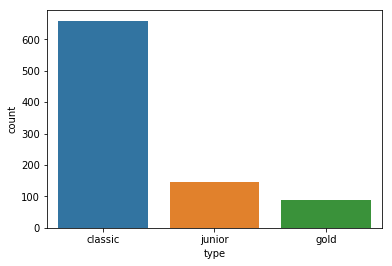

In [16]:
sns.countplot(credit["type"])

### Insights

More no of Classic card users
Out of 5369 customers,892 customers have been offered credit cards 

### Understanding Permanent Orders Information

In [ ]:
order=pd.read_csv("C:/Users/mudmoham/Documents/pr/Banking_Case_Study/banking_data/order.txt",sep=";")

In [ ]:
order.head()

### Imputing Missing Values with mode 

In [ ]:
order["k_symbol"].unique()

In [ ]:
order["k_symbol"]=order["k_symbol"].replace(' ',mode(order["k_symbol"])[0][0])

In [ ]:
order.head()

In [ ]:
sns.countplot(order["k_symbol"])

In [ ]:
order["order_id"].nunique()

In [ ]:
order["account_id"].nunique()

In [ ]:
order["k_symbol"].value_counts()

### Which Order type involves more money

In [ ]:
order.groupby(["k_symbol"])["amount"].mean().plot.bar()

## Insights

Most of orders are issued towards "household payment"
Most of the money is spent for "Loan payment"

### Understanding Transactions

In [3]:
transactions=pd.read_csv("C:/Users/mudmoham/Documents/pr/Banking_Case_Study/banking_data/trans.txt",sep=";",parse_dates=["date"])

In [4]:
transactions.head()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,695247,2378,1993-01-01,PRIJEM,VKLAD,700.0,700.0,NaN,NaN,NaN
1,171812,576,1993-01-01,PRIJEM,VKLAD,900.0,900.0,NaN,NaN,NaN
2,207264,704,1993-01-01,PRIJEM,VKLAD,1000.0,1000.0,NaN,NaN,NaN
3,1117247,3818,1993-01-01,PRIJEM,VKLAD,600.0,600.0,NaN,NaN,NaN
4,579373,1972,1993-01-02,PRIJEM,VKLAD,400.0,400.0,NaN,NaN,NaN


In [11]:
transactions.shape

(1056320, 10)

In [6]:
transactions["account_id"].nunique()

4500

In [7]:
col=["operation","k_symbol","bank","account"]
for i in col:
    transactions[i]=transactions[i].fillna("Not Applicable")    

In [8]:
transactions["k_symbol"].unique()

array(['Not Applicable', 'DUCHOD', 'UROK', 'SIPO', 'SLUZBY', ' ',
       'POJISTNE', 'SANKC. UROK', 'UVER'], dtype=object)

In [9]:
transactions["k_symbol"]=transactions["k_symbol"].replace(' ',"SIPO")

In [10]:
transactions["k_symbol"].unique()

array(['Not Applicable', 'DUCHOD', 'UROK', 'SIPO', 'SLUZBY', 'POJISTNE',
       'SANKC. UROK', 'UVER'], dtype=object)

## 1.2 Identify if there is any relation between the type of credit card issued to a disponent with his average credit balance maintained in transaction account

In [37]:
disponent=disposition[disposition["type"]=="DISPONENT"]

In [38]:
credit_disp=pd.merge(credit,disposition,on="disp_id")

In [30]:
credit_disp.head()

,card_id,disp_id,type_x,issued,client_id,account_id,type_y
0,1005,9285,classic,1993-11-07,9593,7753,OWNER
1,104,588,classic,1994-01-19,588,489,OWNER
2,747,4915,classic,1994-02-05,4915,4078,OWNER
3,70,439,classic,1994-02-08,439,361,OWNER
4,577,3687,classic,1994-02-15,3687,3050,OWNER


In [48]:
disp_accounts=credit_disp[credit_disp["account_id"].isin(list(disponent["account_id"].unique()))]

In [49]:
disp_accounts.head()

,card_id,disp_id,type_x,issued,client_id,account_id,type_y
4,577,3687,classic,1994-02-15,3687,3050,OWNER
20,658,4251,classic,1994-12-25,4251,3521,OWNER
28,208,1246,gold,1995-02-08,1246,1039,OWNER
29,766,5200,classic,1995-02-11,5200,4318,OWNER
30,464,2984,classic,1995-02-21,2984,2472,OWNER


In [50]:
disp_trans=pd.merge(disp_accounts,transactions,on="account_id")

In [51]:
disp_trans.shape

(39753, 16)

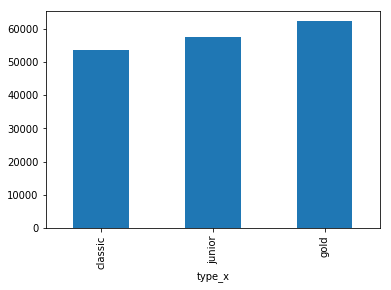

In [56]:
disp_trans.groupby(["type_x"])["balance"].mean().sort_values().plot.bar()

### Insights

Credit balance maintained in "gold" card is higher compared to classic and junior

 ## 1.3 Identify whether any demographic factors is showing strong association with loan defaulters

In [86]:
loan_accounts=pd.merge(loans,account,on="account_id")

In [87]:
loan_accounts.head()

,loan_id,account_id,date_x,amount,duration,payments,status,district_id,frequency,date_y
0,5314,1787,1993-07-05,96396,12,8033.0,B,30,POPLATEK TYDNE,1993-03-22
1,5316,1801,1993-07-11,165960,36,4610.0,A,46,POPLATEK MESICNE,1993-02-13
2,6863,9188,1993-07-28,127080,60,2118.0,A,45,POPLATEK MESICNE,1993-02-08
3,5325,1843,1993-08-03,105804,36,2939.0,A,12,POPLATEK MESICNE,1993-01-30
4,7240,11013,1993-09-06,274740,60,4579.0,A,1,POPLATEK TYDNE,1993-02-14


In [88]:
loan_defaulters=loan_accounts[loan_accounts["status"]=="B"]
loan_payers=loan_accounts[loan_accounts["status"]=="A"]

In [81]:
demographics=demographics.rename(columns={"A1":"district_id"})

In [82]:
demographics.head()

,district_id,A2,A3,A4,A9,A10,A11,A14,Unemployment_Rate,No of Crimes Committed,No of Municipalties
0,1,Hl.m. Praha,Prague,1204953,1,100.0,12541,167,0.72,184784.0,1
1,2,Benesov,central Bohemia,88884,5,46.7,8507,132,3.52,4833.0,114
2,3,Beroun,central Bohemia,75232,5,41.7,8980,111,4.16,5637.0,86
3,4,Kladno,central Bohemia,149893,6,67.4,9753,109,9.69,11136.0,100
4,5,Kolin,central Bohemia,95616,6,51.4,9307,118,8.28,5656.0,100


In [89]:
defaulters_districts=pd.merge(loan_defaulters,demographics,on="district_id")
payers_districts=pd.merge(loan_payers,demographics,on="district_id")

In [84]:
defaulters_districts.head()

,loan_id,account_id,date_x,amount,duration,payments,status,district_id,frequency,date_y,A2,A3,A4,A9,A10,A11,A14,Unemployment_Rate,No of Crimes Committed,No of Municipalties
0,5314,1787,1993-07-05,96396,12,8033.0,B,30,POPLATEK TYDNE,1993-03-22,Sokolov,west Bohemia,94812,10,81.8,9650,100,7.05,5789.0,38
1,6111,5428,1993-09-24,174744,24,7281.0,B,24,POPLATEK MESICNE,1993-04-14,Karlovy Vary,west Bohemia,122603,8,80.0,8991,128,3.40,10471.0,54
2,6650,8073,1994-02-17,49320,12,4110.0,B,24,POPLATEK PO OBRATU,1993-09-03,Karlovy Vary,west Bohemia,122603,8,80.0,8991,128,3.40,10471.0,54
3,6228,6034,1993-12-01,464520,60,7742.0,B,6,POPLATEK TYDNE,1993-03-19,Kutna Hora,central Bohemia,77963,4,51.5,8546,126,6.97,5760.0,89
4,5338,1888,1997-08-30,57360,12,4780.0,B,6,POPLATEK MESICNE,1996-10-21,Kutna Hora,central Bohemia,77963,4,51.5,8546,126,6.97,5760.0,89


In [85]:
defaulters_districts.shape

(31, 20)

In [92]:
payers_districts.shape

(203, 20)

In [109]:
defaulters_districts.head()

,loan_id,account_id,date_x,amount,duration,payments,status,district_id,frequency,date_y,A2,A3,A4,A9,A10,A11,A14,Unemployment_Rate,No of Crimes Committed,No of Municipalties
0,5314,1787,1993-07-05,96396,12,8033.0,B,30,POPLATEK TYDNE,1993-03-22,Sokolov,west Bohemia,94812,10,81.8,9650,100,7.05,5789.0,38
1,6111,5428,1993-09-24,174744,24,7281.0,B,24,POPLATEK MESICNE,1993-04-14,Karlovy Vary,west Bohemia,122603,8,80.0,8991,128,3.40,10471.0,54
2,6650,8073,1994-02-17,49320,12,4110.0,B,24,POPLATEK PO OBRATU,1993-09-03,Karlovy Vary,west Bohemia,122603,8,80.0,8991,128,3.40,10471.0,54
3,6228,6034,1993-12-01,464520,60,7742.0,B,6,POPLATEK TYDNE,1993-03-19,Kutna Hora,central Bohemia,77963,4,51.5,8546,126,6.97,5760.0,89
4,5338,1888,1997-08-30,57360,12,4780.0,B,6,POPLATEK MESICNE,1996-10-21,Kutna Hora,central Bohemia,77963,4,51.5,8546,126,6.97,5760.0,89


In [111]:
print("No of Inhabitants,Loan Defaulters mean:{} and Loan Payers Mean:{}".format(defaulters_districts["A4"].mean(),payers_districts["A4"].mean()))

No of Inhabitants,Loan Defaulters mean:246433.4193548387 and Loan Payers Mean:316102.28571428574


In [112]:
print("No of Municipalities,Loan Defaulters mean:{} and Loan Payers Mean:{}".format(defaulters_districts["No of Municipalties"].mean(),payers_districts["No of Municipalties"].mean()))

No of Municipalities,Loan Defaulters mean:66.06451612903226 and Loan Payers Mean:65.02463054187191


In [113]:
print("No of Cities,Loan Defaulters mean:{} and Loan Payers Mean:{}".format(defaulters_districts["A9"].mean(),payers_districts["A9"].mean()))

No of Cities,Loan Defaulters mean:4.67741935483871 and Loan Payers Mean:5.197044334975369


In [114]:
print("Ration of Urban Inhabitants,Loan Defaulters mean:{} and Loan Payers Mean:{}".format(defaulters_districts["A10"].mean(),payers_districts["A10"].mean()))

Ration of Urban Inhabitants,Loan Defaulters mean:68.4709677419355 and Loan Payers Mean:69.42758620689649


In [115]:
print("Average Salary,Loan Defaulters mean:{} and Loan Payers Mean:{}".format(defaulters_districts["A11"].mean(),payers_districts["A11"].mean()))

Average Salary,Loan Defaulters mean:9432.129032258064 and Loan Payers Mean:9685.679802955665


In [117]:
print("No of Entreprenuers,Loan Defaulters mean:{} and Loan Payers Mean:{}".format(defaulters_districts["A14"].mean(),payers_districts["A14"].mean()))

No of Entreprenuers,Loan Defaulters mean:121.74193548387096 and Loan Payers Mean:123.1871921182266


In [118]:
print("Unemployment Rate,Loan Defaulters mean:{} and Loan Payers Mean:{}".format(defaulters_districts["Unemployment_Rate"].mean(),payers_districts["Unemployment_Rate"].mean()))

Unemployment Rate,Loan Defaulters mean:6.496774193548388 and Loan Payers Mean:6.401225045372043


In [120]:
print("No of Crimes Commited,Loan Defaulters mean:{} and Loan Payers Mean:{}".format(defaulters_districts["No of Crimes Committed"].mean(),payers_districts["No of Crimes Committed"].mean()))

No of Crimes Commited,Loan Defaulters mean:27758.967741935485 and Loan Payers Mean:38584.66813585688


### Insights
Loan defaulters:
1).They are from districts having more Unemployment Rate
2).They are from districts having less Entreprenuers
3).They are from districts having less Average salary
4).They are from districts having less urban inhabitants
5).They are from districts having more municipalities and less cities and less inhabitants

However,These factors slightly influence loan defaulters

# Derived table of Transactions

We can see that transactions table contains lakhs of transactions which will become huge when joined with other tables.
So we have to derive meaningful features from Transactions table.
Entire table are classified into 
### Debit transactions:
 'VYBER' stands for Withdrawal in Cash
 'VYBER KARTOU' stands for Credit Card Withdrawal
 'PREVOD NA UCET' stands for Remittance to Another Bank
 'SIPO' stands for Household Payment
 'SLUZBY' stands for Payment of Statement
 'POJISTNE' stands for Insurance Payment
 'SANKC. UROK' stands for Sanction Interest if Negative Balance
 'UVER' stands for Loan Payment
 
 ### credit Transactions:
 'VKLAD' stands for Credit in Cash
 'PREVOD Z UCTU' stands for Collection from Another Bank
 'DUCHOD' stands for Old-age Pension Payment
 'UROK' stands for Interest Credited
 
 So we can derive meaningful features such as Total Debited Amount,Total Credited Amount,Average Debit Balance,Average Credit Balance and Total payments.
 
If there are high debits than credits,then there is high chance he cannot repay the loan.
If there are high loan payments,then there is high chance that he can repay the loan.


## Base Table

This is the table which contains all columns used for classifition or prediction
This table is obtained by joining all tables
1). account
2). clients
3). loans
4). credit
5). demographics
6). order
7). trans_transformed(Derived Table)

By Joining all tables,we get the base table that is "cleaned_data.csv"

We are going to apply the model and classify the loan defaulters using this dataset

# Chapter 2

# Pre-Processing

## 2.1 Missing Value Analysis:

Let's Check the Missing Values.

In [4]:
data=pd.read_csv("C:/Users/mudmoham/Documents/pr/Banking_Case_Study/cleaned_data.csv",parse_dates=["Account Creation Date","birth_number","loan grant date","card issued date"])

In [5]:
pd.isnull(data).sum()

account_id                0
district_id_x             0
frequency                 0
Account Creation Date     0
disp_id                   0
client_id                 0
Disposition_Type          0
birth_number              0
district_id               0
Gender                    0
loan_id                   0
loan grant date           0
loan amount               0
loan duration             0
loan monthly payments     0
status                    0
card_id                   0
card type                 0
card issued date          0
district name             0
Region                    0
no of inhabitants         0
no of cities              0
urban ratio               0
average salary            0
Enterprenuers per 1000    0
Unemployment_Rate         0
No of Crimes Committed    0
No of Municipalties       0
order_id                  0
Recepient Bank            0
Recepient Account         0
order debited amount      0
 order payment type       0
Total Credited Amount     0
Average Credit Balan

There are no missing values.Hence we can proceed with next step

## 2.2 Outlier Analysis

Let's check the ouliers

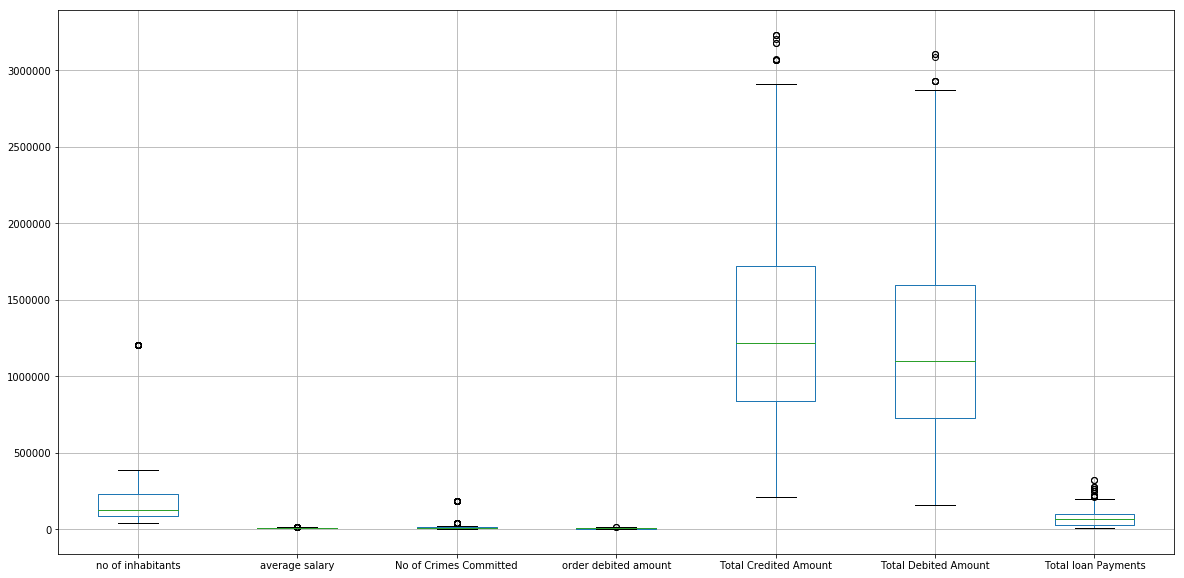

In [7]:
plt.figure(figsize=(20,10))
data[["no of inhabitants","average salary","No of Crimes Committed", "order debited amount", "Total Credited Amount","Total Debited Amount", "Total loan Payments"]].boxplot()

### Replacing Outliers with the help of KNNImputation

We have to replace the outliers with unknown values and then we have to impute the those missing values with the help of KNNImputation.

### Before Outlier Analysis:

In [9]:
pd.isnull(con_data).sum()

account_id                 0
district_id_x              0
disp_id                    0
client_id                  0
district_id                0
loan_id                    0
loan amount                9
loan duration              0
loan monthly payments      0
card_id                    0
no of inhabitants         45
no of cities               0
urban ratio                0
average salary            45
Enterprenuers per 1000     0
Unemployment_Rate          0
No of Crimes Committed    69
No of Municipalties        0
order_id                   0
Recepient Account          0
order debited amount       2
Total Credited Amount     11
Average Credit Balance     0
Total Debited Amount       7
Average debit Balance      0
Total loan Payments       20
dtype: int64

### After Outlier Analysis:

We have Imputed outliers with KNNImputation and we can below there are no more outliers

In [13]:
con_data=pd.DataFrame(KNN(k=3).complete(con_data),columns=con_data.columns)
pd.isnull(con_data).sum()

Imputing row 1/354 with 0 missing, elapsed time: 0.065
Imputing row 101/354 with 3 missing, elapsed time: 0.069
Imputing row 201/354 with 0 missing, elapsed time: 0.072
Imputing row 301/354 with 0 missing, elapsed time: 0.073


account_id                0
district_id_x             0
disp_id                   0
client_id                 0
district_id               0
loan_id                   0
loan amount               0
loan duration             0
loan monthly payments     0
card_id                   0
no of inhabitants         0
no of cities              0
urban ratio               0
average salary            0
Enterprenuers per 1000    0
Unemployment_Rate         0
No of Crimes Committed    0
No of Municipalties       0
order_id                  0
Recepient Account         0
order debited amount      0
Total Credited Amount     0
Average Credit Balance    0
Total Debited Amount      0
Average debit Balance     0
Total loan Payments       0
dtype: int64

## 2.3 Feature Selection

### Correlation Analysis for continous Variables


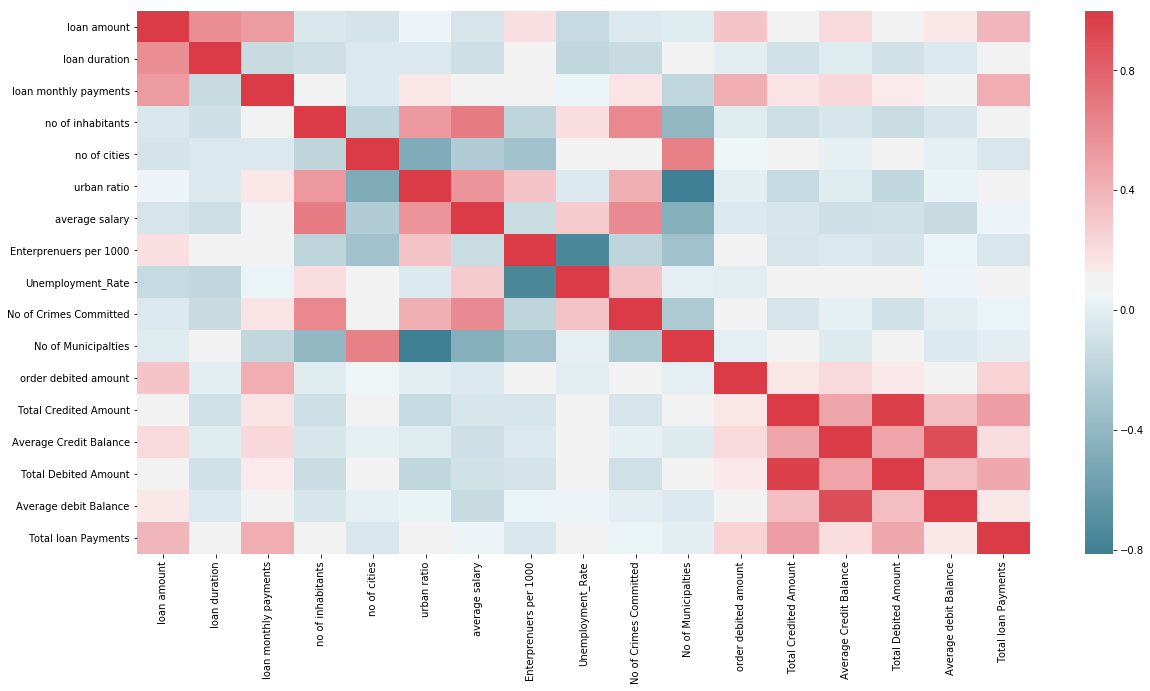

In [16]:
corr=bank_data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,cmap=sns.diverging_palette(220,10,as_cmap=True),mask=np.zeros_like(corr,dtype=np.bool))

We can see that 
"urban Ratio" and  "No of municipalities": highly negatively correlated
"Total Credited Amount" and "Total Debited Amount": highly positively correlated
"Average Credit Balance" and "Average Debit Balance": highly positively correlated

so we can drop one from each pair.

### Chi-Square Test of Independence for Categorical Variables:

In [19]:
for col in bank_data.columns:
	if 	(bank_data[col].dtype==np.object) & (col!="status"):
		chi2,p,dof,expected=chi2_contingency(pd.crosstab(bank_data["status"],bank_data[col]))
		print(col)
		print(p)

frequency
0.675225904113
Disposition_Type
1.0
Gender
0.251385926029
card type
0.000599083759714
district name
1.49627223994e-17
Region
0.00564687871183
Recepient Bank
0.185564700827
 order payment type
0.399559805784


we can delete those variables whose p value is greater than 0.05(critical value)
so we can delete the following variables:
frequency
Disposition_Type
Gender
Recepient Bank
order payment type

## 2.4 Feature Scaling

Before Scaling the variables,Let's check the normal distribution of the data

[[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A35A1394E0>


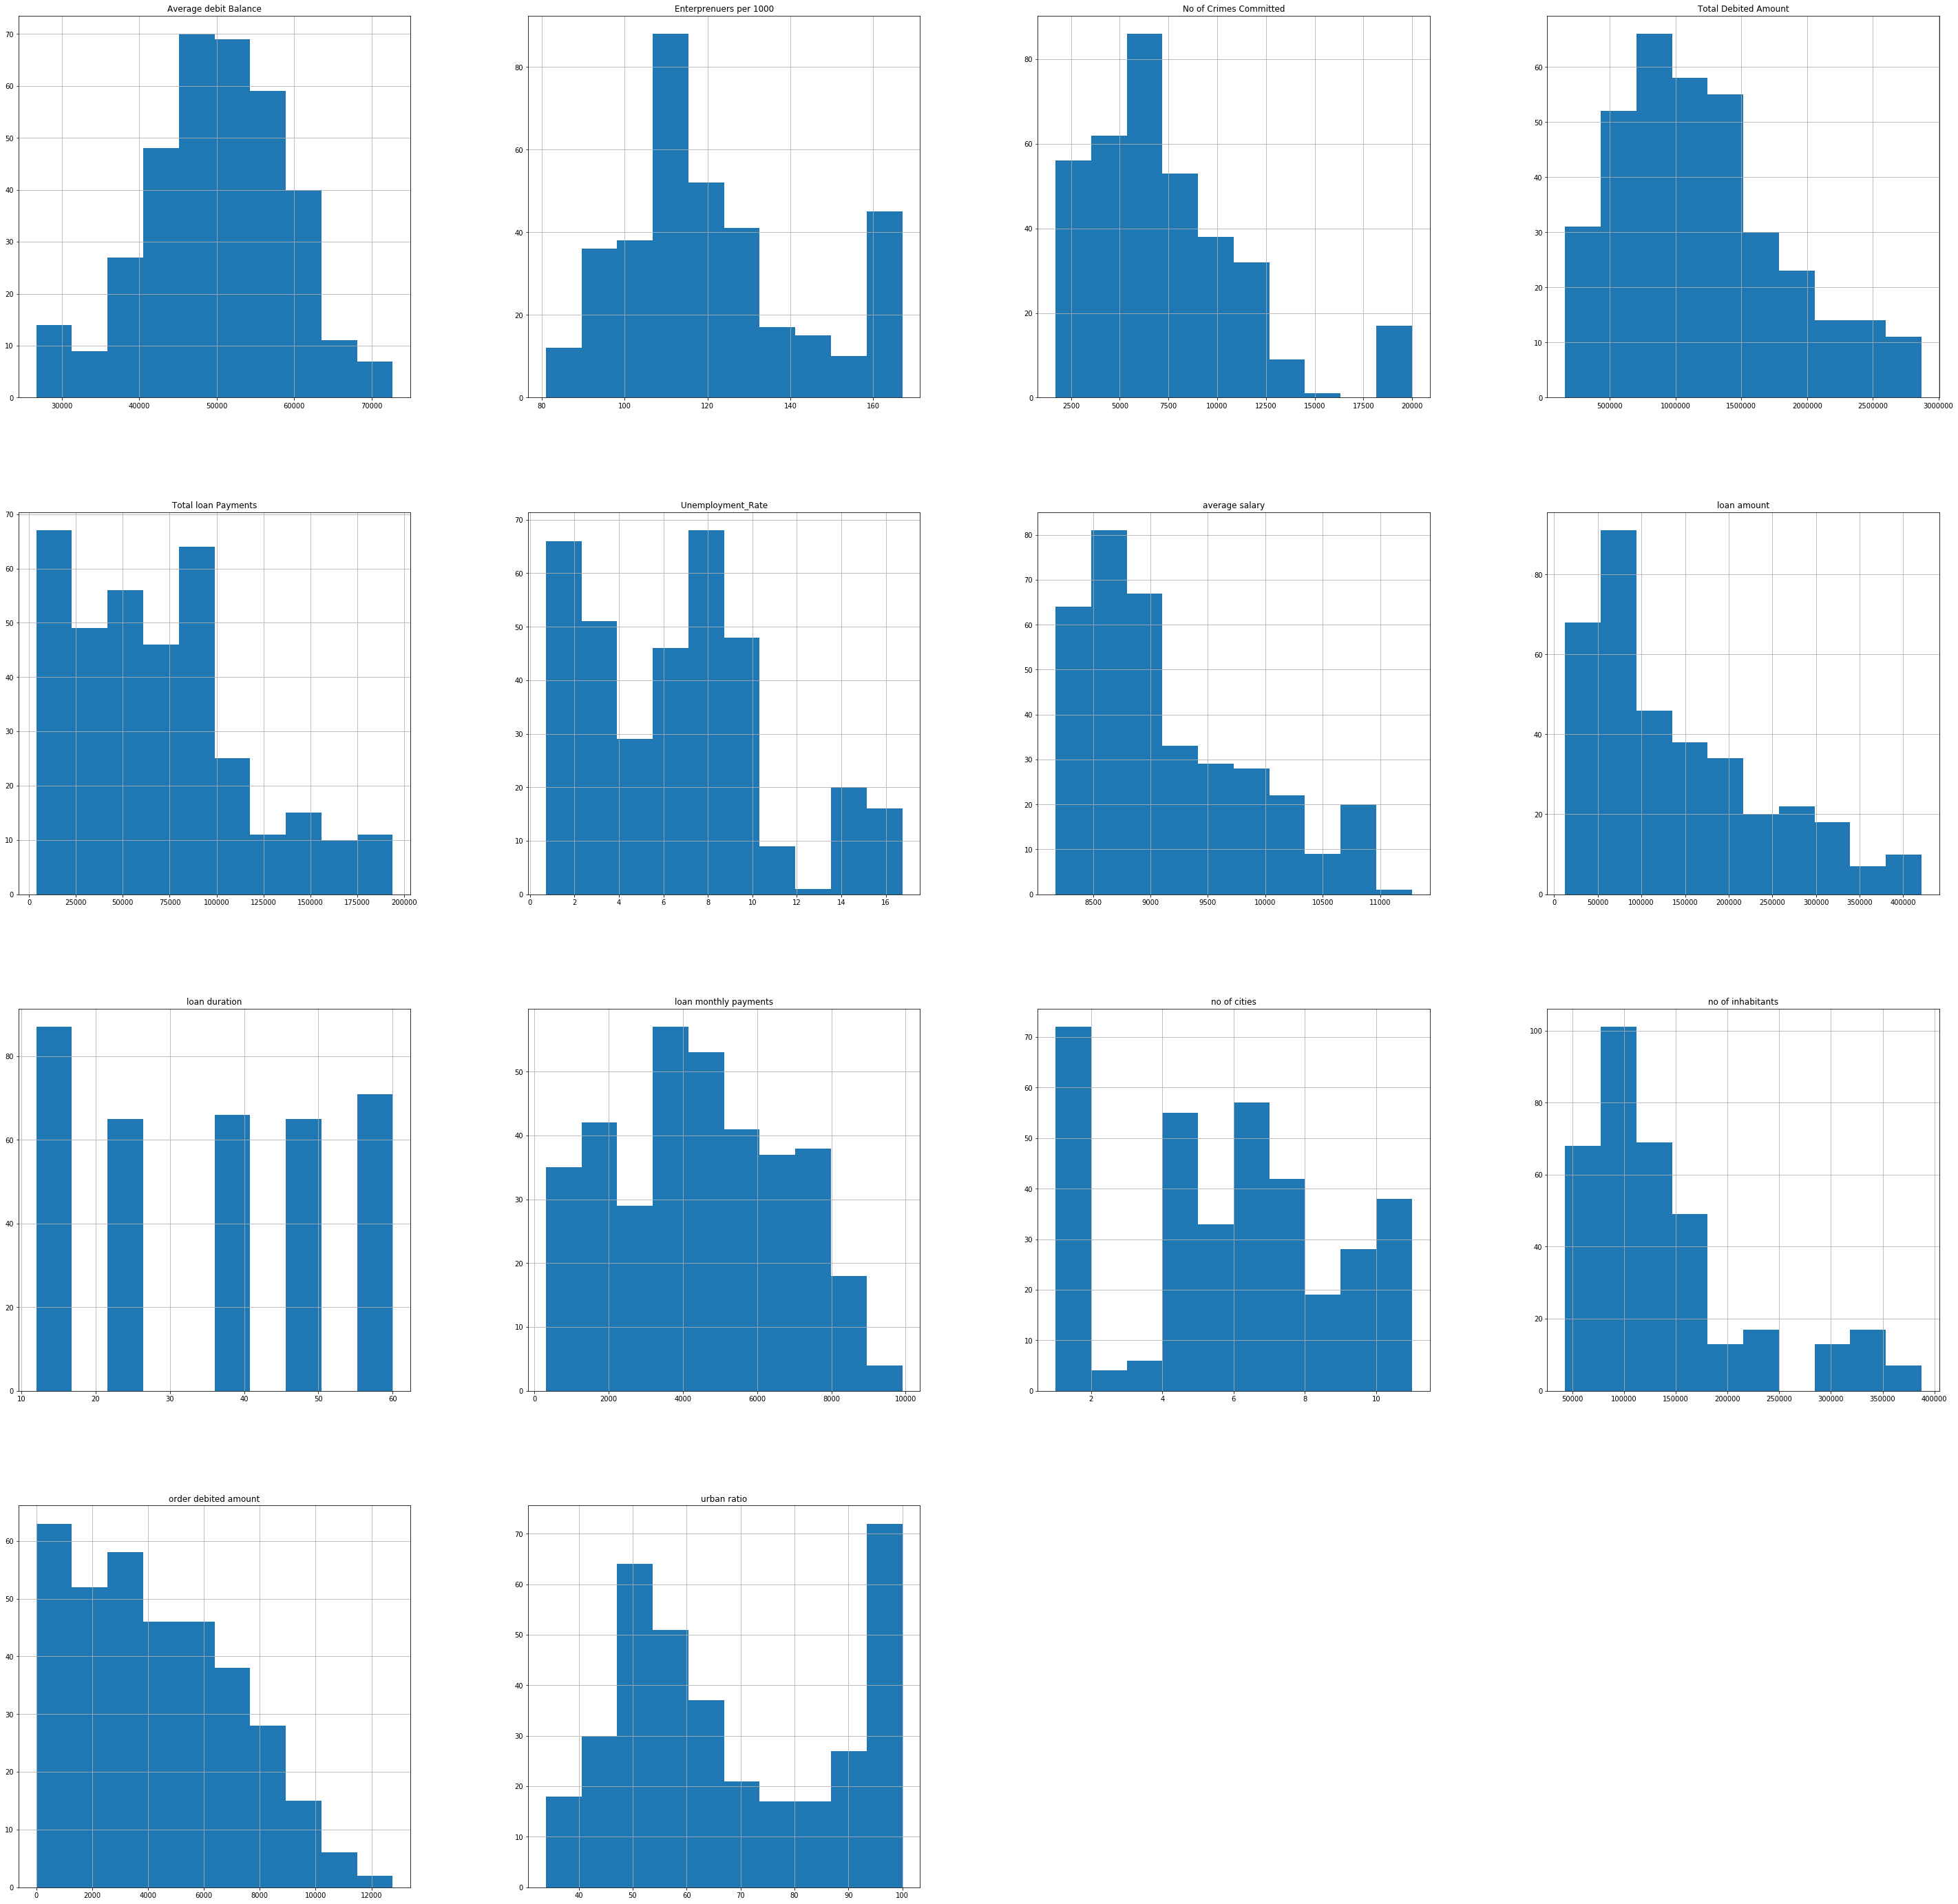

In [32]:
fig=plt.figure(figsize=(50,50))
ax=fig.gca()
print(bank_data.hist(ax=ax))

we can see that most of the variables are not normally distributed.
Hence we scale the variables using "Normalization" method.

we can see below we have scaled all variables in the range of (0,1)

In [33]:
for col in bank_data.columns:
	if bank_data[col].dtype==np.object:
		bank_data[col]=pd.Categorical(bank_data[col])
		bank_data[col]=bank_data[col].cat.codes	

In [37]:
pre_processed_data=pd.DataFrame(MinMaxScaler().fit_transform(bank_data),columns=bank_data.columns)
pre_processed_data.head()

,status,card type,district name,Region,loan amount,loan duration,loan monthly payments,no of inhabitants,no of cities,urban ratio,average salary,Enterprenuers per 1000,Unemployment_Rate,No of Crimes Committed,order debited amount,Total Debited Amount,Average debit Balance,Total loan Payments
0,0.000000,0.5,0.016393,0.142857,0.128882,0.00,0.533444,0.094013,0.4,0.118003,0.259987,0.348837,0.214732,0.215044,0.425772,0.844326,0.856898,0.322641
1,0.000000,0.0,0.081967,0.714286,0.228326,0.50,0.273703,0.391198,0.8,0.618759,0.603093,0.627907,0.150437,0.612309,0.230257,0.406111,0.148711,0.536293
2,0.000000,0.0,0.081967,0.714286,0.228326,0.50,0.273703,0.391198,0.8,0.618759,0.603093,0.627907,0.150437,0.612309,0.548220,0.406111,0.148711,0.536293
3,0.000000,0.0,0.081967,0.714286,0.255795,0.25,0.475516,0.391198,0.8,0.618759,0.603093,0.627907,0.150437,0.612309,0.382139,0.664430,0.718957,0.595360
4,0.666667,0.0,0.081967,0.714286,0.392873,0.50,0.468223,0.391198,0.8,0.618759,0.603093,0.627907,0.150437,0.612309,0.376705,0.508955,0.572809,0.763639


## 2.5 Dividing Data into Training and Test

Training Data:
We are going to train data for the accounts for which status is "A" or "B"
'A' stands for contract finished, no problems
'B' stands for contract finished, loan not payed

Test Data:
We are going to test the data for the accounts for which status is "C" or "D"
'C' stands for running contract, OK thus-far
'D' stands for running contract, client in debt

## 2.6 Target Class Imbalance Problem

In [39]:
ytrain.value_counts()

0.0    135
1.0      5
Name: status, dtype: int64

we can see that target column "status" has imbalance problem.
There are only 5 observations with status "B"
So if we develop the model,it will be biased to status "A" and consider status "B" as noise.
So even if we get 98% Accuracy it will not make any sense.
Let's try to overcome this problem with the help of "SMOTE"(Synthetic Minority Over Sampling Technique)

In [40]:
from imblearn.over_sampling import SMOTE
oversampler=SMOTE(random_state=0,k_neighbors=3)
xtrain_imb,ytrain_imb=oversampler.fit_sample(xtrain,ytrain)
xtrain_imb=pd.DataFrame(xtrain_imb,columns=xtrain.columns)
ytrain_imb=pd.Series(ytrain_imb)

In [41]:
ytrain_imb.value_counts()

1.0    135
0.0    135
dtype: int64

In [ ]:
We can see that status "B" is replicated by Over Sampling.
Now both status has equal weightage(50%) in the dataset.
Hence there will be no bias problem

# Chapter 3

# Modelling

Let us check the Cross Validation scores of some models.

### 3.1 Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
rf=RandomForestClassifier(random_state=0,max_depth=3,min_samples_leaf=15) 
cv_score=np.mean(cross_val_score(rf,xtrain_imb,ytrain_imb,cv=5))
print(cv_score)
rf.fit(xtrain_imb,ytrain_imb)
y_pred=rf.predict(xtest)

0.977777777778


### 3.2 Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=0)
cv_score=np.mean(cross_val_score(lr,xtrain_imb,ytrain_imb,cv=5))
print(cv_score)

0.944444444444


### 3.3 Naive Bayes

In [47]:
from sklearn.naive_bayes import GaussianNB 
gn=GaussianNB() 
cv_score=np.mean(cross_val_score(gn,xtrain_imb,ytrain_imb,cv=5))
print(cv_score)

0.966666666667


### 3.4 KNN

In [49]:
from sklearn.neighbors import KNeighborsClassifier 
knn=KNeighborsClassifier(n_neighbors=3) 
cv_score=np.mean(cross_val_score(knn,xtrain_imb,ytrain_imb,cv=5))
print(cv_score)

0.940740740741


### 3.5 Decision Tree

In [50]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=10,random_state=0)
cv_score=np.mean(cross_val_score(dt,xtrain_imb,ytrain_imb,cv=5))
print(cv_score)

0.914814814815


### 3.6 Summary of Cross Validation Scores

Decision Tree:91.4%
Logistic Regression:94.4%
KNN:94.7%
Naive Bayes:96.7%
Random Forest:97.8%

We can see that Random Forest outperforms all other models.
So let's predict the output using these models.

# Chapter 4

# Loan Defaulters

In [52]:
y_pred=pd.DataFrame(y_pred,index=xtest.index,columns=["Loan Defaulters"])
test_output=data[(data["status"]=="C") | (data["status"]=="D")]
test_output=test_output.join(y_pred)
output=test_output[round(test_output["Loan Defaulters"])==1]["account_id"].drop_duplicates()

In [53]:
output

24      6924
151    11186
156    10644
317      105
336     7637
Name: account_id, dtype: int64

we have successfully predicted loan defaulters using Random Forest Model

## Accounts who are likely to default in repaying the lones

6924
11186
10644
105
7637

We can see that there are 5 accounts who are likely to default in repaying the loans when contract ends